<a href="https://colab.research.google.com/github/sree2712/Maxplain/blob/main/Maxplain_POC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Explainerdashboard - German

In [ ]:
pip install explainerdashboard

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
# import shap

In [ ]:
training_data = pd.read_csv("german_train.csv")
test_data = pd.read_csv("german_test.csv")
training_data = training_data.rename(columns={'Unnamed: 0': 'Id'})
test_data = test_data.rename(columns={'Unnamed: 0': 'Id'})

In [ ]:
X_train = training_data.drop(columns=['y','Id'])
y_train = training_data['y']
# train_ids = pd.DataFrame()
train_ids = training_data['Id']
X_train.index = train_ids

In [ ]:
X_test = test_data.drop(columns=['y','Id'])
y_test = test_data['y']
# test_ids = pd.DataFrame()
test_ids = test_data['Id']
X_test.index = test_ids

In [ ]:
X_test.head(10)

,Gender,ForeignWorker,Single,Age,LoanDuration,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,NumberOfOtherLoansAtBank,NumberOfLiableIndividuals,...,loanpurposeBusiness,loanpurposeEducation,loanpurposeElectronics,loanpurposeFurniture,loanpurposeHomeAppliances,loanpurposeNewCar,loanpurposeOther,loanpurposeRepairs,loanpurposeRetraining,loanpurposeUsedCar
Id,,,,,,,,,,,,,,,,,,,,,
993,1,0,1,30,36,3959,4,3,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
859,1,1,1,26,9,3577,1,2,1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
298,1,0,1,43,18,2515,3,4,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
553,1,0,1,27,12,1995,4,1,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
672,1,0,1,42,60,10366,2,4,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
971,1,0,1,43,24,7393,1,4,1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27,0,0,0,42,12,409,3,3,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,1,0,1,51,9,2507,2,4,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
306,0,0,0,24,30,4811,2,4,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test_bck = X_test
y_test_bck = y_test

In [ ]:
# Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# # Encode the target labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
# y_test_encoded = label_encoder.transform(y_test.values.ravel())

In [ ]:
# Convert the scaled data back to DataFrames
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_train_scaled_df.index = train_ids
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
# X_test_scaled_df.index = test_ids

In [ ]:
# X_test_scaled_df.head()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import numpy as np

lr_pipeline2 = Pipeline([
                        ('lr', GradientBoostingClassifier())])
lr_pipeline2.fit(X_train, y_train)

print("Train Score:", lr_pipeline2.score(X_train, y_train))
print("Score:", lr_pipeline2.score(X_test, y_test))
print("Portion y==1:", np.sum(y_test == 1)
      * 1. / y_test.shape[0])

Train Score: 0.8825
Score: 0.745
Portion y==1: 0.71


In [ ]:
# # Explain predictions using explainerdashboard
# X_train = pd.concat([X_train, train_ids['Id']], axis=1)
# X_test = pd.concat([X_test, test_ids['Id']], axis=1)
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(
    lr_pipeline2, X_test, y_test,
    labels=["Bad Credit Risk", "Good Credit Risk"],
    index_name="Instance",
    target="Credit Risk",
    cats_notencoded={},
    model_output="probability"
)

dashboard = ExplainerDashboard(explainer,
                               title="Credit Risk Prediction Explainer",
                               importances=True,
                               model_summary=True,
                               contributions=True,
                               whatif=True,
                               shap_dependence=False,
                               shap_interaction=False,
                               decision_trees=False
                               )
dashboard.run(port=8050)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


splitting pipeline...
Failed to retrieve new column names from transformer_pipeline.get_feature_names_out()!
transformer pipeline outputs a DataFrame with the same number of columnsso trying to assign column names from X.columns: ['Gender', 'ForeignWorker', 'Single', 'Age', 'LoanDuration', 'LoanAmount', 'LoanRateAsPercentOfIncome', 'YearsAtCurrentHome', 'NumberOfOtherLoansAtBank', 'NumberOfLiableIndividuals', 'HasTelephone', 'CheckingAccountBalanceGreaterOrEqualTo0', 'CheckingAccountBalanceGreaterOrEqualThan200', 'SavingsAccountBalanceGreaterOrEqualThan200', 'SavingsAccountBalanceGreaterOrEqualThan500', 'MissedPayments', 'NoCurrentLoan', 'CriticalAccountOrLoansElsewhere', 'OtherLoansAtBank', 'OtherLoansAtStore', 'HasCoapplicant', 'HasGuarantor', 'OwnsHouse', 'RentsHouse', 'Unemployed', 'YearsAtCurrentJobLessThan1', 'YearsAtCurrentJobGreaterOrEqualThan4', 'JobClassIsSkilled', 'loanpurposeBusiness', 'loanpurposeEducation', 'loanpurposeElectronics', 'loanpurposeFurniture', 'loanpurposeHom

/usr/local/lib/python3.10/dist-packages/dash/dash.py:516: UserWarning: JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.


Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ExplainerDashboard.terminate(8050)

Trying to shut down dashboard on port 8050...


In [ ]:
X_test_cat = X_test_bck[(X_test_bck['NoCurrentLoan'] > 0.5) & (X_test_bck['SavingsAccountBalanceGreaterOrEqualThan200'] < 0.5)]
# X_test_cat = X_test_bck[(X_test_bck['NoCurrentLoan'] < 0.5) & (X_test_bck['LoanDuration'] <= 33) & (X_test_bck['Age'] <= 21.5)]

In [ ]:
X_test_cat

,Gender,ForeignWorker,Single,Age,LoanDuration,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,NumberOfOtherLoansAtBank,NumberOfLiableIndividuals,...,loanpurposeBusiness,loanpurposeEducation,loanpurposeElectronics,loanpurposeFurniture,loanpurposeHomeAppliances,loanpurposeNewCar,loanpurposeOther,loanpurposeRepairs,loanpurposeRetraining,loanpurposeUsedCar
Id,,,,,,,,,,,,,,,,,,,,,
558,1,0,1,27,24,3552,3,4,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
55,1,0,1,26,6,783,1,2,1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
175,0,0,0,53,30,7485,4,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
272,1,0,1,36,48,12169,4,4,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
876,1,0,1,36,18,1940,3,4,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,1,0,1,31,36,2746,4,4,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bla = 1

### ExplainerDashboard - Compas

In [ ]:
import pandas as pd
import numpy as np

# from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
training_data_com = pd.read_csv("compas_train.csv")
test_data_com = pd.read_csv("compas_test.csv")

In [ ]:
X_train_com = training_data_com.drop(columns=['y','id'])
y_train_com = training_data_com['y']
# train_ids = pd.DataFrame()
train_ids_com = training_data_com['id']
X_train_com.index = train_ids_com

X_test_com = test_data_com.drop(columns=['y','id'])
y_test_com = test_data_com['y']
# test_ids = pd.DataFrame()
test_ids_com = test_data_com['id']
X_test_com.index = test_ids_com

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1).fit(X_train_com, y_train_com)
print("Score:", clf.score(X_test_com, y_test_com))
print("Portion y==0:", np.sum(y_test_com == 1) * 1. / y_test_com.shape[0])

Score: 0.8520518358531317
Portion y==0: 0.8185745140388769


In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(
    clf, X_test_com, y_test_com,
    labels=["Likely to commit crime", "Unlikely to commit crime"],
    index_name="Instance",
    target="Likelihood of commiting a crime",
    cats_notencoded={},
    model_output="probability"
)

dashboard = ExplainerDashboard(explainer,
                               title="Recidivism Prediction Explainer",
                               importances=True,
                               model_summary=True,
                               contributions=True,
                               whatif=True,
                               shap_dependence=False,
                               shap_interaction=False,
                               decision_trees=False
                               )
dashboard.run(port=8051)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Note: model_output=='probability'. For GradientBoostingClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:516: UserWarning: JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.


Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8051
You can terminate the dashboard with ExplainerDashboard.terminate(8051)


<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
X_test_com_tran_cat = X_test_com[(X_test_com['number_of_prior_crimes'] <1.5) & (X_test_com['age'] < 24.5) & (X_test_com['months_in_jail'] > 4.5) & (X_test_com['months_in_jail'] <= 7.5)]
# if (numberofpriorcrimes > 4.5) and (age > 34.5) and (monthsinjail > 7.5) and (monthsinjail <= 65.5) and (monthsinjail > 38.5)

In [ ]:
X_test_com_tran_cat

,age,recidivated,number_of_prior_crimes,months_in_jail,felony,misdemeanor,woman,man,black
id,,,,,,,,,
4406,21,0,0,7,1,0,0,1,0
1092,24,0,1,6,1,0,0,1,0
5485,22,1,0,5,1,0,0,1,1
10158,24,1,0,6,1,0,0,1,1
10505,21,0,0,5,1,0,0,1,1


### LIME

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=31ff4d4b00a2b178a3a3774394d72a864e7d6b78add3b75554d601d0d25f1580
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Check the accuracy
# print("Train Score:", lr_pipeline2.score(X_train_scaled_df, y_train_encoded))
# print("Score:", lr_pipeline2.score(X_test_scaled, y_test_encoded))
train_preds = lr_pipeline2.predict(X_train)
test_preds = lr_pipeline2.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, train_preds))
print("Test accuracy:", accuracy_score(y_test, test_preds))

Train accuracy: 0.8825
Test accuracy: 0.745


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Identify the categorical features' indices
categorical_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']

# Initialize LIME Tabular Explainer
lime_explainer = LimeTabularExplainer(X_train.values,
                                      feature_names=X_train.columns,
                                      class_names=["Bad Credit Risk", "Good Credit Risk"],
                                      verbose=True,
                                      categorical_features=categorical_features,
                                      mode='classification',
                                      discretizer='decile',
                                      kernel_width=5,
                                      discretize_continuous=True)

In [ ]:
cols = list(X_test.columns)

In [ ]:
# Select an instance from the test set
instance_idx = 0
instance = X_test.iloc[instance_idx].values

# Generate LIME explanation
exp = lime_explainer.explain_instance(instance, lr_pipeline2.predict_proba, num_features=5)

# Print the explanation
exp.show_in_notebook(show_table=True, show_all=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Intercept 0.7691945505045769
Prediction_local [0.48343022]
Right: 0.45027486357114677


In [ ]:
# Get feature attributions from the LIME explanation
attributions = exp.as_list()

# Print the feature attributions
for feature, weight in attributions:
    print(f"{feature}: {weight}")

NoCurrentLoan <= 0.00: 0.19704276197139917
loanpurposeUsedCar <= 0.00: -0.18563973742203208
30.00 < LoanDuration <= 36.00: -0.1500924751223304
CriticalAccountOrLoansElsewhere <= 0.00: -0.10188544016535633
loanpurposeElectronics <= 0.00: -0.06115200947321678


### Shap - German

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
background_data = shap.sample(X_train, 100)

In [ ]:
explainer = shap.KernelExplainer(lr_pipeline2.predict_proba, background_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/di

In [ ]:
shap_values

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])

In [ ]:
# # Create the force plot with limited features
# shap.initjs()
# shap.plots.force(
#     explainer.expected_value[1],
#     shap_values[1][0],
#     X_test.iloc[0],
#     feature_names=cols,
#     link='logit'  # Optional, to display values in probability space for classification models
# )

/usr/local/lib/python3.9/dist-packages/shap/plots/_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



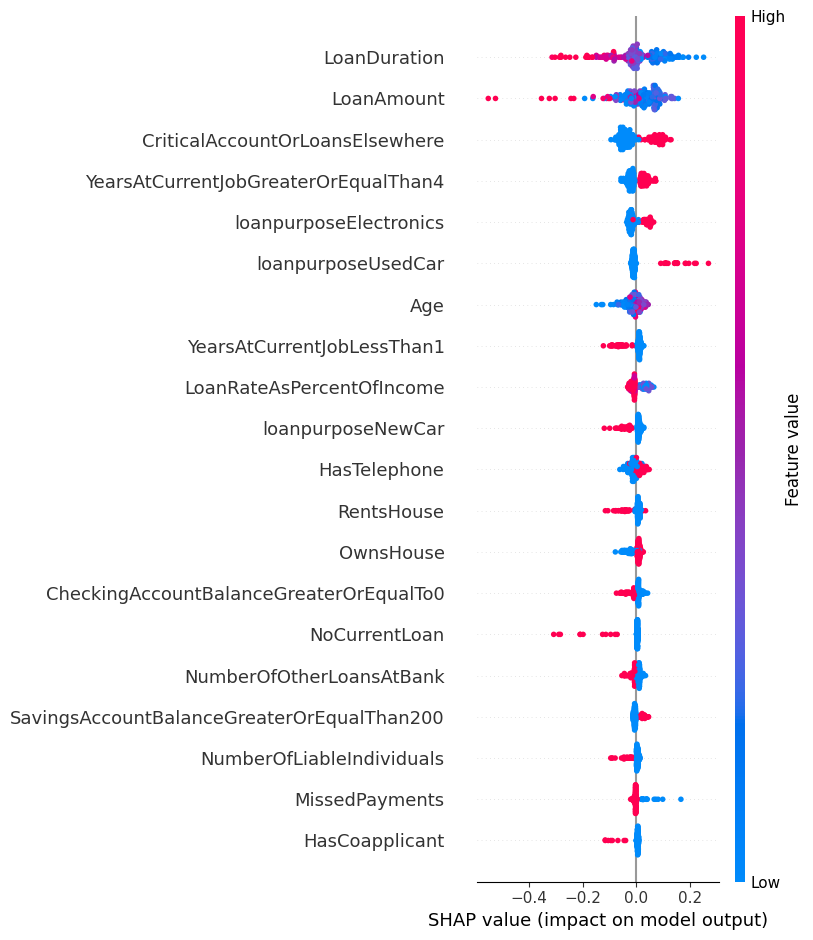

In [ ]:
shap.summary_plot(shap_values[1], X_test, plot_type="dot")

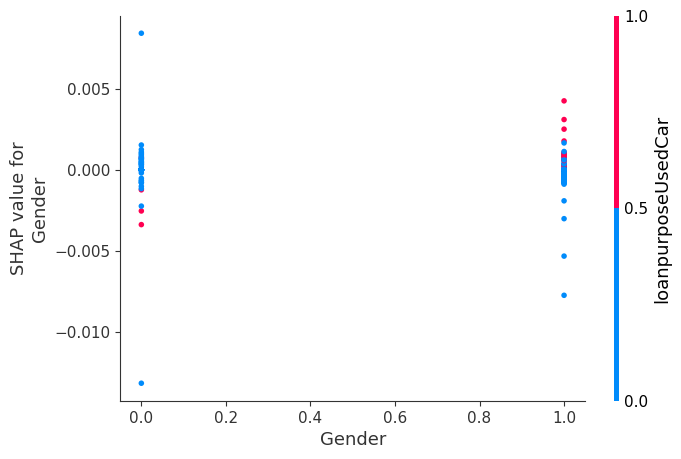

In [ ]:
# Plot the dependence plot
feature_index = 0  # Change this to the index of the feature you're interested in
shap.dependence_plot(feature_index, shap_values[1], X_test)

### OpenXAI

In [ ]:
!git clone https://github.com/AI4LIFE-GROUP/OpenXAI.git

Cloning into 'OpenXAI'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 759 (delta 61), reused 89 (delta 59), pack-reused 655
Receiving objects: 100% (759/759), 42.58 MiB | 16.31 MiB/s, done.
Resolving deltas: 100% (180/180), done.


In [ ]:
cd OpenXAI

/content/OpenXAI


In [ ]:
pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/OpenXAI
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 376.2/376.2 KB 34.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.8/366.8 KB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
pip --version

pip 22.0.4 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)


In [ ]:
# Utils
import torch
import numpy as np
import pickle

# ML models
from openxai.LoadModel import LoadModel

# Data loaders
from openxai.dataloader import return_loaders

# Explanation models
from openxai.Explainer import Explainer

# Evaluation methods
from openxai.evaluator import Evaluator

# Perturbation methods required for the computation of the relative stability metrics
from openxai.explainers.catalog.perturbation_methods import NormalPerturbation
from openxai.explainers.catalog.perturbation_methods import NewDiscrete_NormalPerturbation

In [ ]:
# Choose the model and the data set you wish to generate explanations for
data_loader_batch_size = 32
data_name = 'german' # must be one of ['heloc', 'adult', 'german', 'compas']
model_name = 'lr'    # must be one of ['lr', 'ann']

In [ ]:
# Hyperparameters for Lime
lime_mode = 'tabular'
lime_sample_around_instance = True
lime_kernel_width = 0.75
lime_n_samples = 1000
lime_discretize_continuous = False
lime_standard_deviation = float(np.sqrt(0.03))

In [ ]:
# Get training and test loaders
loader_train, loader_test = return_loaders(data_name=data_name,
                                           download=True,
                                           batch_size=data_loader_batch_size)
data_iter = iter(loader_test)
inputs, labels = data_iter.next()
labels = labels.type(torch.int64)

In [ ]:
!python3 ./openxai/Data_Cleaning/german.py

Index(['amount', 'age', 'foreign-worker', 'status_3', 'credit-history_0',
       'credit-history_3', 'purpose_0', 'purpose_2', 'purpose_3', 'purpose_4',
       ...
       'status_4_1', 'credit-history_1_0', 'credit-history_1_1',
       'credit-history_2_0', 'credit-history_2_1', 'credit-history_4_0',
       'credit-history_4_1', 'purpose_1_0', 'purpose_1_1', 'credit-risk'],
      dtype='object', length=110)


In [ ]:
# get full training data set
data_all = torch.FloatTensor(loader_train.dataset.data)

In [ ]:
# Load pretrained ml model
model = LoadModel(data_name=data_name,
                  ml_model=model_name,
                  pretrained=True)

#### custom LIME params

In [ ]:
# You can supply your own set of hyperparameters like so:
param_dict_lime = dict()
param_dict_lime['dataset_tensor'] = data_all
param_dict_lime['std'] = lime_standard_deviation
param_dict_lime['mode'] = lime_mode
param_dict_lime['sample_around_instance'] = lime_sample_around_instance
param_dict_lime['kernel_width'] = lime_kernel_width
param_dict_lime['n_samples'] = lime_n_samples
param_dict_lime['discretize_continuous'] = lime_discretize_continuous
lime = Explainer(method='lime',
                 model=model,
                 dataset_tensor=data_all,
                 param_dict_lime=param_dict_lime)

In [ ]:
lime_custom = lime.get_explanation(inputs,
                                   label=labels)

100%|██████████| 32/32 [00:02<00:00, 11.30it/s]


In [ ]:
lime_custom[0,:]

tensor([-0.1105,  0.0015,  0.0140,  0.0718,  0.0256,  0.0648, -0.0798, -0.0947,
         0.0135,  0.0304, -0.0365,  0.0905,  0.0299, -0.0294, -0.0238,  0.0544,
        -0.0005, -0.1690, -0.0637, -0.1068,  0.0627, -0.0311,  0.0909,  0.1456,
         0.1304,  0.1233,  0.0736, -0.0265,  0.0343, -0.0177, -0.0501,  0.0759,
         0.0011, -0.0307,  0.0335,  0.0098,  0.0304,  0.0557,  0.0551, -0.1661,
         0.1299, -0.0410,  0.2282, -0.0306, -0.0436,  0.0266, -0.0148,  0.1098,
        -0.0376,  0.0926,  0.0249,  0.1181, -0.0392, -0.0045,  0.0838, -0.0256,
        -0.0196, -0.0042,  0.0230,  0.0369])

#### Using default LIME

In [ ]:
# You can also use the default hyperparameters likes so:
lime = Explainer(method='lime',
                 model=model,
                 dataset_tensor=data_all,
                 param_dict_lime=None)
lime_default_exp = lime.get_explanation(inputs.float(),
                                        label=labels)
lime_default_exp[0,:]

100%|██████████| 32/32 [00:01<00:00, 19.05it/s]


tensor([-0.0978,  0.0031,  0.0138,  0.0647,  0.0228,  0.0555, -0.0714, -0.0842,
         0.0139,  0.0261, -0.0318,  0.0803,  0.0271, -0.0243, -0.0202,  0.0460,
         0.0011, -0.1507, -0.0549, -0.0936,  0.0531, -0.0282,  0.0806,  0.1311,
         0.1139,  0.1083,  0.0646, -0.0241,  0.0302, -0.0169, -0.0444,  0.0671,
         0.0019, -0.0257,  0.0272,  0.0069,  0.0271,  0.0500,  0.0494, -0.1468,
         0.1141, -0.0338,  0.2015, -0.0267, -0.0373,  0.0229, -0.0112,  0.0991,
        -0.0347,  0.0832,  0.0203,  0.1042, -0.0336, -0.0048,  0.0734, -0.0213,
        -0.0176, -0.0035,  0.0192,  0.0335])

#### Using default IG

In [ ]:
index = 5
# To use a different explanation method change the method name like so
ig = Explainer(method='ig',
               model=model,
               dataset_tensor=data_all,
               param_dict_lime=None)
ig_default_exp = ig.get_explanation(inputs.float(),
                                    label=labels)
ig_default_exp[index,:]

tensor([-1.1220e-01,  1.6140e-03,  1.4495e-02,  7.2975e-02,  2.5725e-02,
         6.5516e-02, -8.0850e-02, -9.5723e-02,  1.4099e-02,  3.0388e-02,
        -3.6824e-02,  9.1789e-02,  3.0059e-02, -2.9793e-02, -2.3926e-02,
         5.3664e-02, -1.7029e-04, -1.7205e-01, -6.4739e-02, -1.0862e-01,
         6.3505e-02, -3.2604e-02,  9.2270e-02,  1.4886e-01,  1.3226e-01,
         1.2577e-01,  7.4525e-02, -2.7419e-02,  3.4385e-02, -1.7944e-02,
        -5.1353e-02,  7.7317e-02,  1.8461e-03, -3.0900e-02,  3.3744e-02,
         9.4102e-03,  3.0843e-02,  5.6785e-02,  5.6416e-02, -1.6858e-01,
         1.3209e-01, -4.1850e-02,  2.3224e-01, -2.9672e-02, -4.3990e-02,
         2.6350e-02, -1.4800e-02,  1.1177e-01, -3.8539e-02,  9.4543e-02,
         2.4023e-02,  1.1999e-01, -3.8787e-02, -5.1188e-03,  8.5653e-02,
        -2.6342e-02, -1.9359e-02, -4.4289e-03,  2.3376e-02,  3.7752e-02],
       dtype=torch.float64)

#### Choose an evaluation metric

In [ ]:
def generate_mask(explanation, top_k):
    mask_indices = torch.topk(explanation, top_k).indices
    mask = torch.zeros(explanation.shape) > 10
    for i in mask_indices:
        mask[i] = True
    return mask

#### Prepping the perturbation class methods

In [ ]:
# Perturbation class parameters
perturbation_mean = 0.0
perturbation_std = 0.10
perturbation_flip_percentage = 0.03
if data_name == 'compas':
    feature_types = ['c', 'd', 'c', 'c', 'd', 'd', 'd']
# Adult feature types
elif data_name == 'adult':
    feature_types = ['c'] * 6 + ['d'] * 7

# Gaussian feature types
elif data_name == 'synthetic':
    feature_types = ['c'] * 20
# Heloc feature types
elif data_name == 'heloc':
    feature_types = ['c'] * 23
elif data_name == 'german':
    print("HERE")
    feature_types = pickle.load(open('./data/German_Credit_Data/german-feature-metadata.p', 'rb'))

HERE


In [ ]:
# Perturbation methods
if data_name == 'german':
    # use special perturbation class
    perturbation = NewDiscrete_NormalPerturbation("tabular",
                                                  mean=perturbation_mean,
                                                  std_dev=perturbation_std,
                                                  flip_percentage=perturbation_flip_percentage)

else:
    perturbation = NormalPerturbation("tabular",
                                      mean=perturbation_mean,
                                      std_dev=perturbation_std,
                                      flip_percentage=perturbation_flip_percentage)

In [ ]:
input_dict = dict()
index = index

# inputs and models
input_dict['x'] = inputs[index].reshape(-1)
input_dict['input_data'] = inputs
input_dict['explainer'] = ig
input_dict['explanation_x'] = ig_default_exp[index,:].flatten()
input_dict['model'] = model

# perturbation method used for the stability metric
input_dict['perturbation'] = perturbation
input_dict['perturb_method'] = perturbation
input_dict['perturb_max_distance'] = 0.4
input_dict['feature_metadata'] = feature_types
input_dict['p_norm'] = 2
input_dict['eval_metric'] = None

# true label, predicted label, and masks
input_dict['top_k'] = 3
input_dict['y'] = labels[index].detach().item()
input_dict['y_pred'] = torch.max(model(inputs[index].unsqueeze(0).float()), 1).indices.detach().item()
input_dict['mask'] = generate_mask(input_dict['explanation_x'].reshape(-1), input_dict['top_k'])

# required for the representation stability measure
input_dict['L_map'] = model

In [ ]:
evaluator = Evaluator(input_dict,
                      inputs=inputs,
                      labels=labels,
                      model=model,
                      explainer=ig)

In [ ]:
if hasattr(model, 'return_ground_truth_importance'):
    # evaluate rank correlation
    print('RC:', evaluator.evaluate(metric='RC'))

    # evaluate feature agreement
    print('FA:', evaluator.evaluate(metric='FA'))

    # evaluate rank agreement
    print('RA:', evaluator.evaluate(metric='RA'))

    # evaluate sign agreement
    print('SA:', evaluator.evaluate(metric='SA'))

    # evaluate signed rankcorrelation
    print('SRA:', evaluator.evaluate(metric='SRA'))

RC: (array([1.]), 0.9999999999999999)
FA: (array([1.]), 1.0)
RA: (array([1.]), 1.0)
SA: (array([1.]), 1.0)
SRA: (array([1.]), 1.0)


In [ ]:
# evaluate prediction gap on umportant features
print('PGU:', evaluator.evaluate(metric='PGU'))

# evaluate prediction gap on important features
print('PGI:', evaluator.evaluate(metric='PGI'))

# evaluate relative input stability
print('RIS:', evaluator.evaluate(metric='RIS'))

# evaluate relative output stability
print('ROS:', evaluator.evaluate(metric='ROS'))